In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: customer.csv            
  inflating: passengers_on_flights.csv  
  inflating: routes.csv              
  inflating: ticket_details.csv      


In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo

In [ ]:
customer = pd.read_csv('customer.csv')
customer.head()

,customer_id,first_name,last_name,date_of_birth,gender
0,1,Julie,Sam,12-01-1989,F
1,2,Steve,Ryan,03-04-1983,M
2,3,Morris,Lois,09-12-1993,M
3,4,Cathenna,Emily,14-09-1977,F
4,5,Aaron,Kim,18-02-1991,M


In [ ]:
routes = pd.read_csv('routes.csv')
routes.head()

,route_id,flight_num,origin_airport,destination_airport,aircraft_id,distance_miles
0,1,1111,EWR,HNL,767-301ER,4962
1,2,1112,HNL,EWR,767-301ER,4962
2,3,1113,EWR,LHR,A321,3466
3,4,1114,JFK,LAX,767-301ER,2475
4,5,1115,LAX,JFK,767-301ER,2475


In [ ]:
passengers_on_flights = pd.read_csv('passengers_on_flights.csv')
passengers_on_flights.head()

,customer_id,aircraft_id,route_id,depart,arrival,seat_num,class_id,travel_date,flight_num
0,2,A321,34,CRW,COD,01B,Bussiness,26-01-2019,1117
1,2,767-301ER,4,JFK,LAX,01E,Economy,02-09-2018,1114
2,1,ERJ142,9,DEN,LAX,01EP,Economy Plus,26-12-2019,1119
3,1,CRJ900,30,BUR,STT,01FC,First Class,04-11-2018,1140
4,5,767-301ER,12,ABI,ADK,02B,Bussiness,02-07-2018,1122


In [ ]:
ticket_details = pd.read_csv('ticket_details.csv')
ticket_details.head()

,p_date,customer_id,aircraft_id,class_id,no_of_tickets,a_code,Price_per_ticket,brand
0,26-12-2018,27,767-301ER,Economy,1,DAL,130,Emirates
1,02-02-2020,22,ERJ142,Economy Plus,1,AGB,220,Jet Airways
2,03-03-2020,21,CRJ900,Bussiness,1,BOH,490,Bristish Airways
3,04-04-2020,4,767-301ER,First Class,1,AGB,390,Emirates
4,05-05-2020,5,ERJ142,Economy,1,CTM,120,Jet Airways


In [ ]:
# Number of males and females for trips
fig = go.Figure([go.Bar(x=['Male', 'Female'],
                        y=[len(customer[customer['gender'] == 'M']),
                           len(customer[customer['gender'] == 'F'])])])
fig.show()

In [ ]:
groupby_class_id = ticket_details.groupby('class_id')
groupby_class_id.first()

,p_date,customer_id,aircraft_id,no_of_tickets,a_code,Price_per_ticket,brand
class_id,,,,,,,
Bussiness,03-03-2020,21,CRJ900,1,BOH,490,Bristish Airways
Economy,26-12-2018,27,767-301ER,1,DAL,130,Emirates
Economy Plus,02-02-2020,22,ERJ142,1,AGB,220,Jet Airways
First Class,04-04-2020,4,767-301ER,1,AGB,390,Emirates


In [ ]:
# Number of tickets for each type of trip
fig = go.Figure(data=[go.Pie(labels=['Bussiness', 'Economy', 'Economy Plus', 'First Class'],
                      values=groupby_class_id.aggregate(np.sum)['no_of_tickets'].values)])

fig.show()

<ipython-input-35-520488ab6550>:2: FutureWarning:

The operation <function sum at 0x7a33b2b12ef0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.



In [ ]:
full_data = customer.merge(passengers_on_flights).merge(ticket_details).merge(routes)
full_data.head()

,customer_id,first_name,last_name,date_of_birth,gender,aircraft_id,route_id,depart,arrival,seat_num,...,travel_date,flight_num,p_date,no_of_tickets,a_code,Price_per_ticket,brand,origin_airport,destination_airport,distance_miles
0,1,Julie,Sam,12-01-1989,F,ERJ142,9,DEN,LAX,01EP,...,26-12-2019,1119,23-11-2019,1,BFS,250,Jet Airways,DEN,LAX,862
1,29,Watson,Ronald,11-01-1991,M,ERJ142,9,DEN,LAX,11B,...,03-05-2018,1119,01-04-2018,1,EME,510,Jet Airways,DEN,LAX,862
2,1,Julie,Sam,12-01-1989,F,CRJ900,30,BUR,STT,01FC,...,04-11-2018,1140,01-10-2018,1,DEN,320,Bristish Airways,BUR,STT,780
3,19,Joyce,Paul,02-06-1990,F,CRJ900,30,BUR,STT,06EP,...,17-12-2020,1140,12-12-2020,1,DEN,225,Bristish Airways,BUR,STT,780
4,19,Joyce,Paul,02-06-1990,F,CRJ900,30,BUR,STT,06EP,...,17-12-2020,1140,13-12-2020,1,DEN,225,Bristish Airways,BUR,STT,780


In [ ]:
full_data['full_price'] = full_data['no_of_tickets']*full_data['Price_per_ticket']
full_data.head()

,customer_id,first_name,last_name,date_of_birth,gender,aircraft_id,route_id,depart,arrival,seat_num,...,flight_num,p_date,no_of_tickets,a_code,Price_per_ticket,brand,origin_airport,destination_airport,distance_miles,full_price
0,1,Julie,Sam,12-01-1989,F,ERJ142,9,DEN,LAX,01EP,...,1119,23-11-2019,1,BFS,250,Jet Airways,DEN,LAX,862,250
1,29,Watson,Ronald,11-01-1991,M,ERJ142,9,DEN,LAX,11B,...,1119,01-04-2018,1,EME,510,Jet Airways,DEN,LAX,862,510
2,1,Julie,Sam,12-01-1989,F,CRJ900,30,BUR,STT,01FC,...,1140,01-10-2018,1,DEN,320,Bristish Airways,BUR,STT,780,320
3,19,Joyce,Paul,02-06-1990,F,CRJ900,30,BUR,STT,06EP,...,1140,12-12-2020,1,DEN,225,Bristish Airways,BUR,STT,780,225
4,19,Joyce,Paul,02-06-1990,F,CRJ900,30,BUR,STT,06EP,...,1140,13-12-2020,1,DEN,225,Bristish Airways,BUR,STT,780,225


In [ ]:
import plotly.express as px
# A chart that shows the number of customers who arrived at a specific airport
fig = px.histogram(full_data, x="customer_id", y="destination_airport")
fig.show()

In [ ]:
# A chart showing the number of customers who departed from a specific airport
fig = px.histogram(full_data, x="customer_id", y="origin_airport")
fig.show()

In [ ]:
d = full_data.groupby('no_of_tickets').aggregate(np.sum)
d.head()

<ipython-input-82-a4a5223f7cdf>:1: FutureWarning:

The operation <function sum at 0x7a33b2b12ef0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.



,customer_id,route_id,flight_num,Price_per_ticket,distance_miles,full_price
no_of_tickets,,,,,,
1,1067,1369,65749,17454,133577,17454


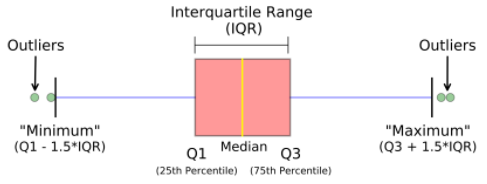

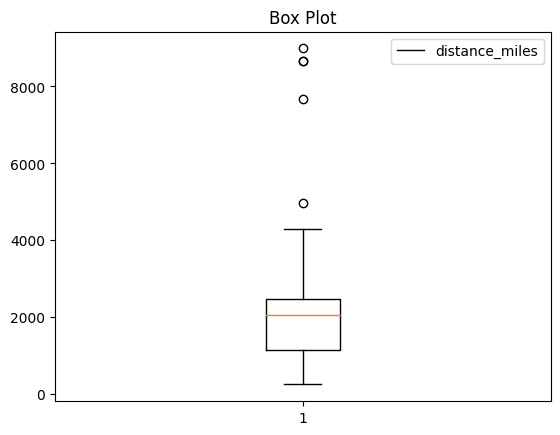

In [ ]:
# A chart showing mean values, quartiles, and outliers
plt.boxplot(full_data["distance_miles"])
plt.title("Box Plot")
plt.legend(["distance_miles"])
plt.show()

In [ ]:
'''
A chart showing the relationship between the departure airport and the destination airport.
The following chart defines the relationship between them in terms of frequency
'''
fig = px.bar(full_data, x="origin_airport", y="destination_airport")
fig.show()

In [ ]:
dates = pd.to_datetime(full_data['date_of_birth'])

<ipython-input-60-e197d193f9fa>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
year = [d.year for d in dates]

In [ ]:
full_data['year'] = year

In [ ]:
from sklearn.preprocessing import LabelEncoder
full_data['destination_airport'] = LabelEncoder().fit_transform(full_data['destination_airport'])

In [ ]:
import plotly.express as px
fig = px.scatter_3d(full_data, x = 'customer_id',
                    y = 'destination_airport',
                    z = 'year')

fig.show()